# NYC Rats

In [1]:
### data analysis and wrangling
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import random as rnd
from decimal import *
from datetime import datetime  
from datetime import timedelta
%matplotlib notebook

### visualization
import matplotlib.pyplot as plt
from matplotlib import animation
import seaborn as sns
from mpl_toolkits.basemap import Basemap



In [2]:
### Load dataset rat sightings from 09/04/2015 to 02/15/2017
dataset_sightings = pd.read_csv("Rat_Sightings.csv",low_memory=False)
### Load dataset rat interventions from 10/14/2019 to 01/26/2018
dataset_intervention = pd.read_csv("Rodent_Inspection.csv",low_memory=False)


In [3]:
# dataset_sightings.head()
# dataset_intervention.head()

In [4]:
# dataset_sightings.groupby('Descriptor').size()  #check that all sightings are indeed Rat Sighting

In [5]:
# dataset_sightings.info()

In [6]:
### Data cleansing
dataset_sightings['Created Date'] = pd.to_datetime(dataset_sightings['Created Date'], format='%m/%d/%Y %I:%M:%S %p')
dataset_sightings['YearMonth'] = dataset_sightings['Created Date'].map(lambda x: x.strftime('%Y-%m'))
dataset_sightings_locations = dataset_sightings.iloc[:,[1,49,50,52]]

dataset_sightings_locations = dataset_sightings_locations.dropna()

dataset_intervention['INSPECTION_DATE'] = pd.to_datetime(dataset_intervention['INSPECTION_DATE'], format='%m/%d/%Y %I:%M:%S %p')
intervention_types = dataset_intervention.groupby('INSPECTION_TYPE')
intervention_types_numbers = intervention_types.size()
bait_interventions = intervention_types.get_group('BAIT')
bait_interventions = bait_interventions.groupby('RESULT').get_group('Bait applied') ###where bait was actually applied
bait_interventions = bait_interventions.dropna()

bait_interventions['YearMonth'] = bait_interventions['INSPECTION_DATE'].map(lambda x: x.strftime('%Y-%m'))
### getting rid of years that don't overlap with data in the sightings dataset 
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-01']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-07']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-10']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-11']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2009-12']
bait_interventions = bait_interventions[bait_interventions['YearMonth'] != '2018-12']

<IPython.core.display.Javascript object>


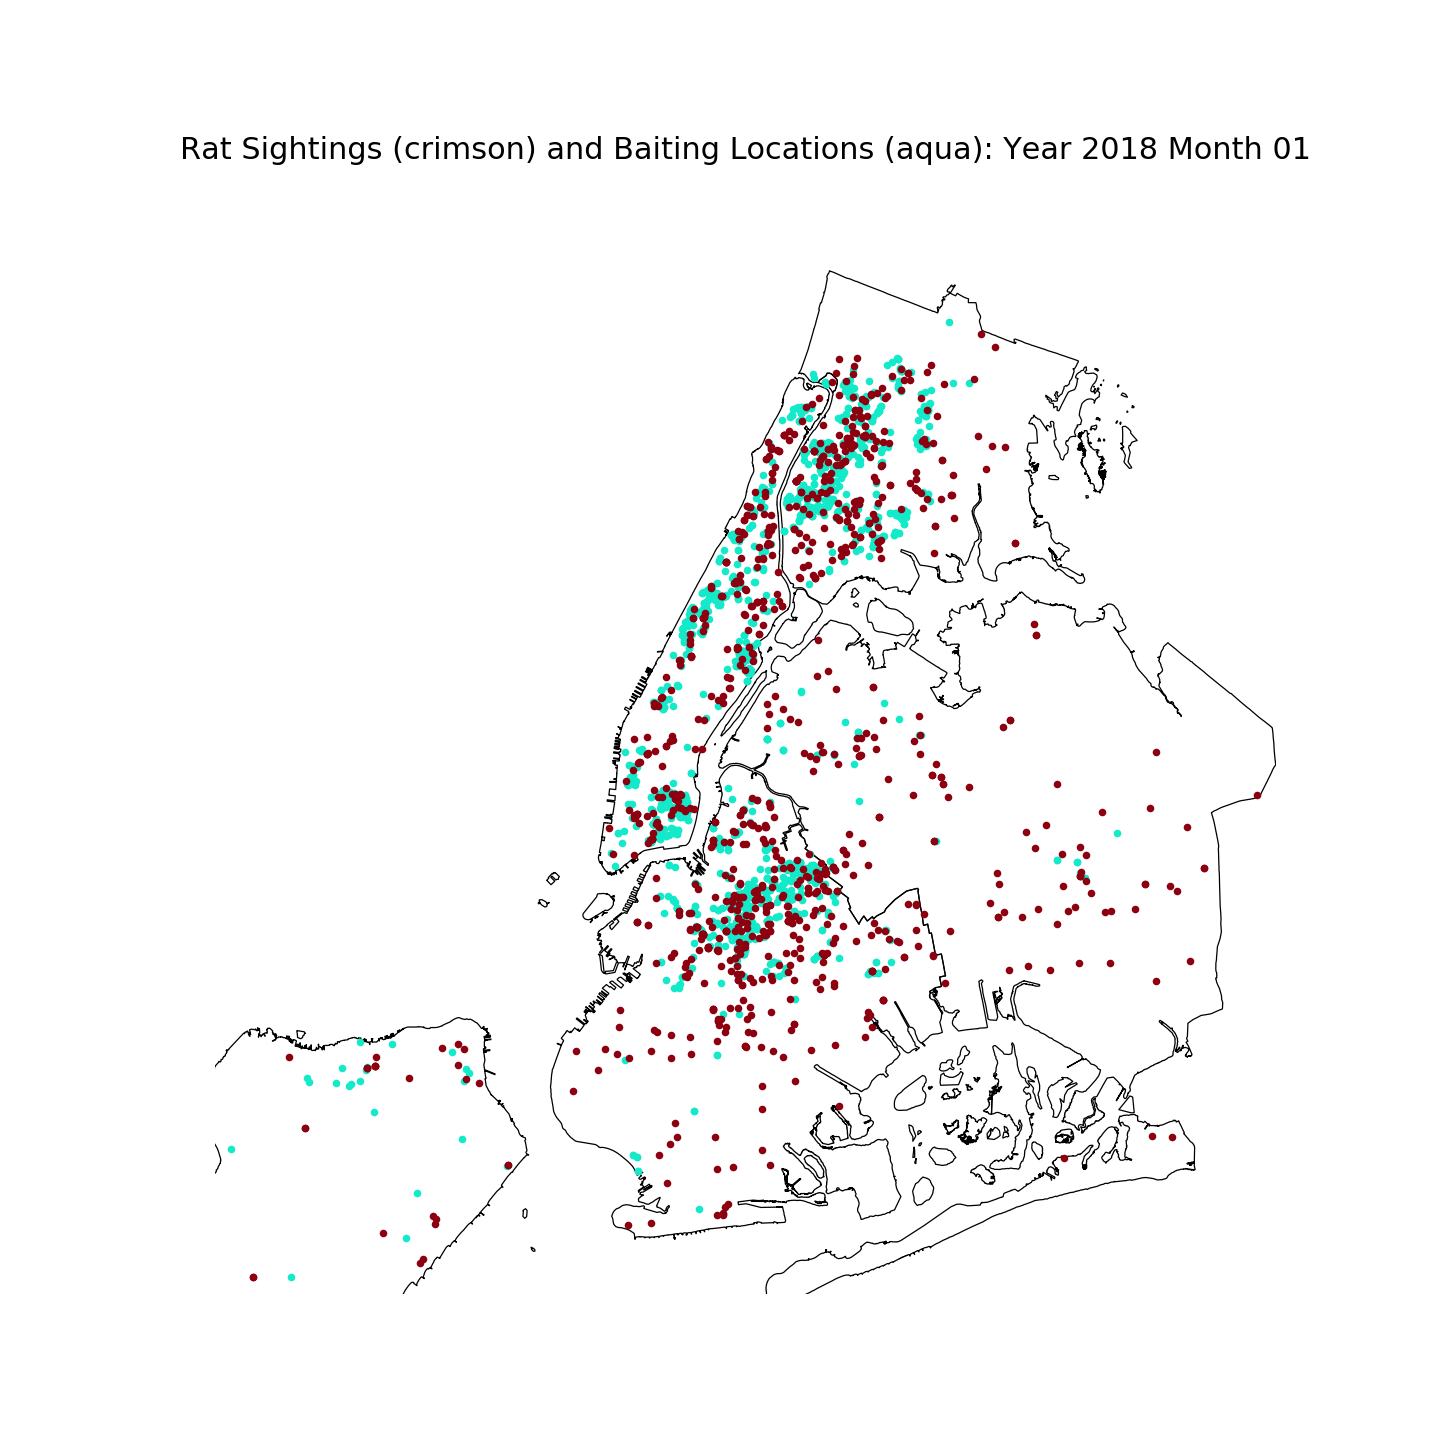

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [7]:
anim_data_sightings = dataset_sightings_locations.groupby('YearMonth') 
anim_data_bait = bait_interventions.groupby('YearMonth')

timepoints = dataset_sightings_locations['YearMonth'].unique()
timepoints.sort()
 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

m = Basemap(llcrnrlat=40.55,urcrnrlat=40.95,llcrnrlon=-74.2, urcrnrlon=-73.7, lat_ts=40.5, resolution='c', projection='merc')
m.readshapefile('geo_export_466a4803-d862-4a61-914b-7783568f80f5', 'comarques')
m.drawmapboundary(fill_color='#ffffff', linewidth=.0)

xi,yi = m(0, 0)
pointi = m.plot(xi, yi, 'ro', markersize=2, color = 'xkcd:aqua')[0]

x,y = m(0, 0)
point = m.plot(x, y, 'ro', markersize=2, color = 'xkcd:crimson')[0]



def init():
    pointi.set_data([], [])
    return pointi, point,

def animate(i):
    xi, yi = m(anim_data_bait.get_group(timepoints[i]).LONGITUDE.tolist(), anim_data_bait.get_group(timepoints[i]).LATITUDE.tolist())
    pointi.set_data(xi, yi)
    x, y = m(anim_data_sightings.get_group(timepoints[i]).Longitude.tolist(), anim_data_sightings.get_group(timepoints[i]).Latitude.tolist())
    point.set_data(x, y)
    plt.title('Rat Sightings (crimson) and Baiting Locations (aqua): Year ' + str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].year) + ' Month '+ str(anim_data_sightings.get_group(timepoints[i]).iloc[0,0].month).zfill(2))
#     ###frames for makeing a gif:
#     plt.savefig('RatSightingsBaiting'+ str(i).zfill(2) +'.jpg', dpi=200)
    return pointi, point,

anim_bait = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(timepoints)-1, interval=100, blit=True,repeat = False, save_count=len(timepoints))

plt.show()



<IPython.core.display.Javascript object>


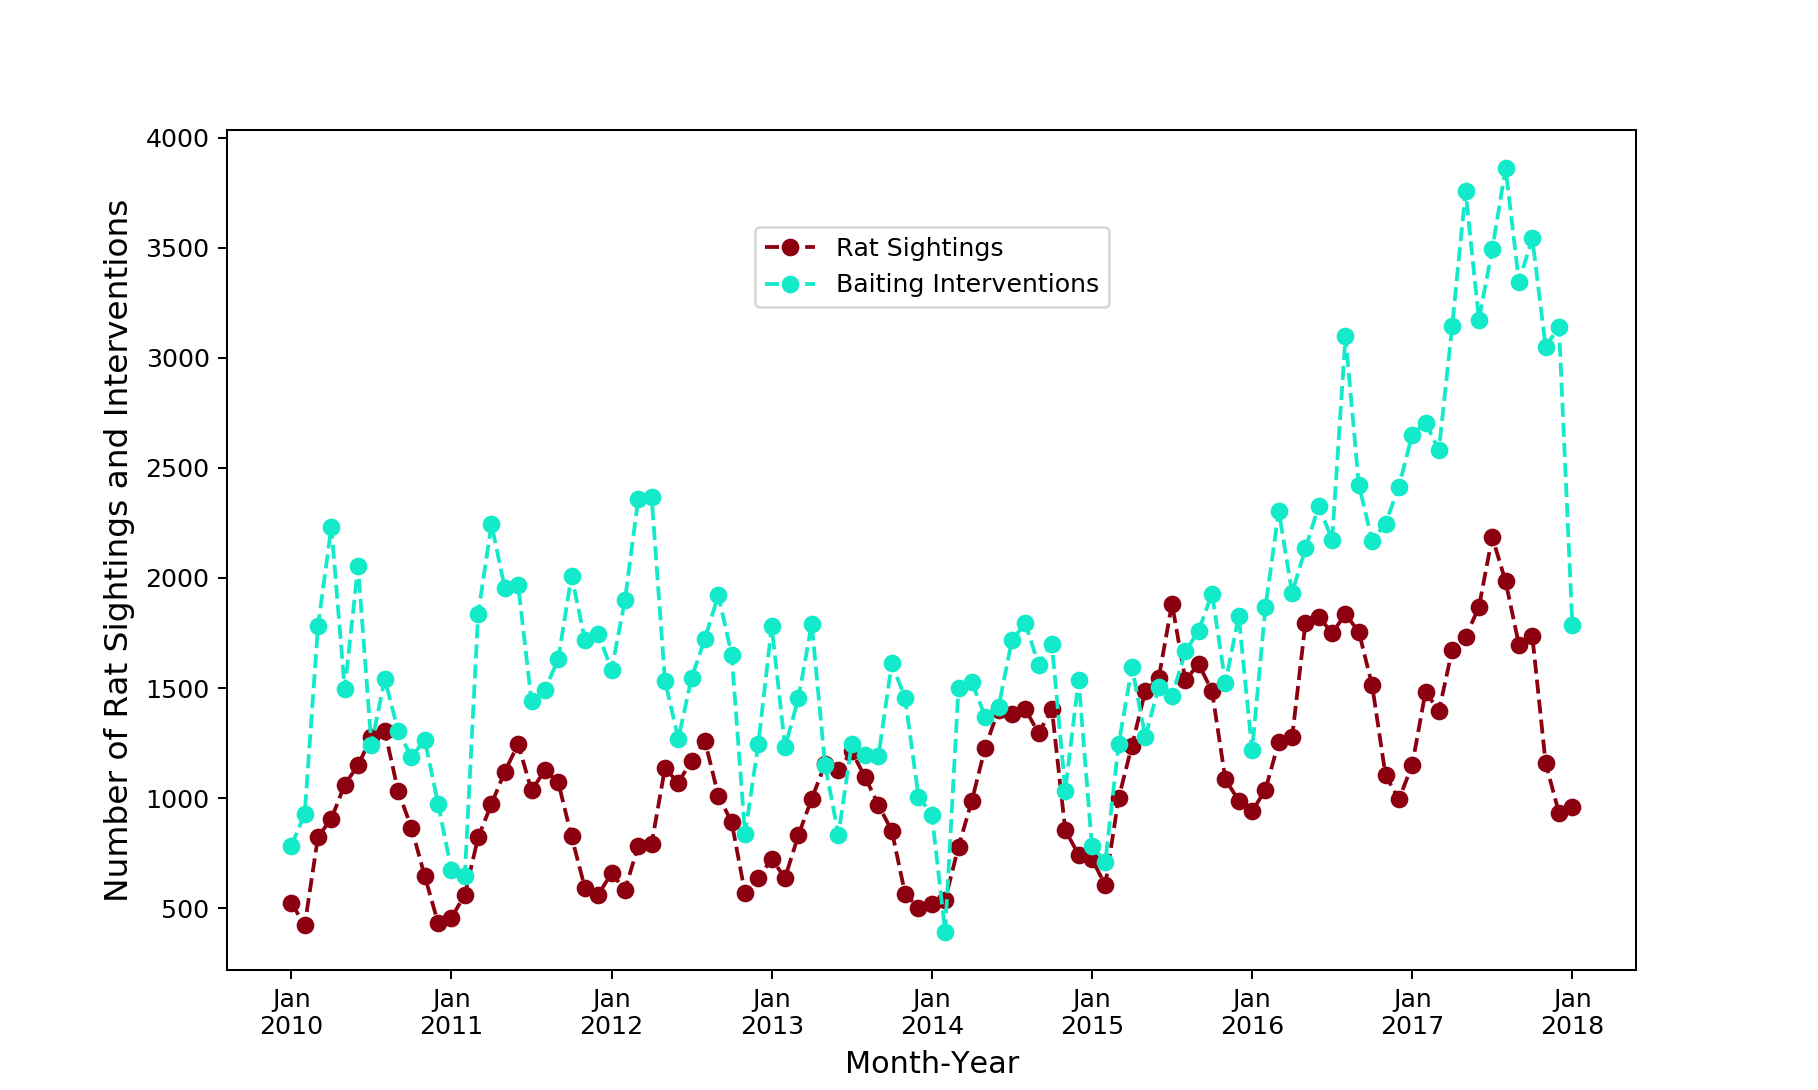

In [8]:
#total number of sightings and baiting interventions as a function of time
fig = plt.figure(figsize=(10, 6))
num_sightings = anim_data_sightings.size().values
num_baitings = anim_data_bait.size().values

plt.plot(timepoints[:-1],num_sightings[:-1],linestyle='--', marker='o',color = 'xkcd:crimson',label="Rat Sightings")
plt.plot(timepoints[:-1],num_baitings,linestyle='--', marker='o',color = 'xkcd:aqua', label="Baiting Interventions")
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Rat Sightings and Interventions", fontsize=13)
plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01'],
           ["Jan\n2010","Jan\n2011","Jan\n2012","Jan\n2013","Jan\n2014","Jan\n2015","Jan\n2016","Jan\n2017","Jan\n2018"])
plt.legend(loc=9, bbox_to_anchor=(0.5, 0.9))
plt.savefig('RatSightingsBaiting.jpg', dpi=200)
plt.show()
